### Week 5 Assignment Programming Exercises
**Name: Jinyang Yu**  
**Date: Feb 7, 2023**

Produce a visualization from quantitative data - your own or something we have used in class. Your visualization should go beyond the default output (I am very familiar with what the default looks like :) ). Think about your own preferred aesthetics, and be creative! 

**This project visualizes public attitudes toward same-sex sexual behaviors in China with data from Chinese General Social Survey (CGSS).**  
In the questionnaires of CGSS 2010-2018, Question a40:   
What about sexual behaviors between two adults of the same sex -- do you think it is always wrong, almost always wrong, cannot say right or wrong, wrong only sometimes, or not wrong at all?  
This graph will depict the frequency of each answer from 2010 to 2018.

**1. Import libraries and data**  
"Always wrong" is coded as 1; "Almost always wrong" is coded as 2; "Cannot say right or wrong" is coded as 3; "Wrong only sometimes" is coded as 4; "Not wrong at all" is coded as 5.

In [64]:
import seaborn as sns #visualization library
import matplotlib.pyplot as plt #base visualization library
import pandas as pd
df = pd.read_csv("../data/CGSS_2010_2018.csv", sep=',', encoding='utf8')
df.head()

,2010,2012,2013,2015,2017,2018
0,3.0,3.0,1.0,1.0,1.0,3
1,1.0,1.0,1.0,2.0,4.0,3
2,3.0,2.0,1.0,1.0,2.0,1
3,1.0,2.0,1.0,1.0,3.0,1
4,3.0,1.0,1.0,1.0,1.0,1


**2. Organize data**

In [65]:
# change floats to integers; drop NA values
df = df.dropna().astype({'2010': int, '2012': int,'2013': int,'2015': int,'2017': int,'2018': int})
df.head()

,2010,2012,2013,2015,2017,2018
0,3,3,1,1,1,3
1,1,1,1,2,4,3
2,3,2,1,1,2,1
3,1,2,1,1,3,1
4,3,1,1,1,1,1


**3. Create a frequency dataframe through extracting counts**

In [66]:
counts_2010=df["2010"].value_counts()
type(df["2010"].value_counts())
counts_2012=df["2012"].value_counts()
counts_2013=df["2013"].value_counts()
counts_2015=df["2015"].value_counts()
counts_2017=df["2017"].value_counts()
counts_2018=df["2018"].value_counts()
counts_2010

1    8972
3    1187
2     498
0     135
4      94
5      59
Name: 2010, dtype: int64

In [67]:
df_counts=pd.concat([counts_2010, counts_2012, counts_2013,counts_2015,counts_2017,counts_2018], axis=1)
df_counts.sort_index(ascending=True, axis=0, inplace=True)
df_counts.index.name='num_attitudes'
df_counts

,2010,2012,2013,2015,2017,2018
num_attitudes,,,,,,
0,135,97,217,617,354,511
1,8972,8793,8436,6975,7809,7236
2,498,638,686,1208,629,816
3,1187,1227,1352,1800,1683,1980
4,94,138,190,267,321,284
5,59,52,64,78,149,118


**4. Reshape the dataframe to a tidy format**

In [101]:
#reshape the dataframe to a tidy format
tidy_df_counts = df_counts.melt(var_name='year', value_name='counts')
tidy_df_counts['num_attitudes']=[0,1,2,3,4,5,0,1,2,3,4,5,0,1,2,3,4,5,0,1,2,3,4,5,0,1,2,3,4,5,0,1,2,3,4,5]
tidy_df_counts
attitudes=[]#Adding description of attitudes
for i in tidy_df_counts['num_attitudes']:
    if i ==0:
        attitudes.append('Do not know / Refuse to answer')
    elif i==1:
        attitudes.append('Always wrong')
    elif i==2:
        attitudes.append('Almost always wrong')
    elif i==3:
        attitudes.append('Cannot say right or wrong')  
    elif i==4:
        attitudes.append('Wrong only sometimes')    
    elif i==5:
        attitudes.append('Not wrong at all')

tidy_df_counts['attitudes']=attitudes
tidy_df_counts

,year,counts,num_attitudes,attitudes
0,2010,135,0,Do not know / Refuse to answer
1,2010,8972,1,Always wrong
2,2010,498,2,Almost always wrong
3,2010,1187,3,Cannot say right or wrong
4,2010,94,4,Wrong only sometimes
5,2010,59,5,Not wrong at all
6,2012,97,0,Do not know / Refuse to answer
7,2012,8793,1,Always wrong
8,2012,638,2,Almost always wrong
9,2012,1227,3,Cannot say right or wrong


In [102]:
#filter out people who chose 'Do not know / Refuse to answer'
tidy_df_counts = tidy_df_counts[tidy_df_counts['attitudes'] != 'Do not know / Refuse to answer']
tidy_df_counts

,year,counts,num_attitudes,attitudes
1,2010,8972,1,Always wrong
2,2010,498,2,Almost always wrong
3,2010,1187,3,Cannot say right or wrong
4,2010,94,4,Wrong only sometimes
5,2010,59,5,Not wrong at all
7,2012,8793,1,Always wrong
8,2012,638,2,Almost always wrong
9,2012,1227,3,Cannot say right or wrong
10,2012,138,4,Wrong only sometimes
11,2012,52,5,Not wrong at all


**5. Visualization**

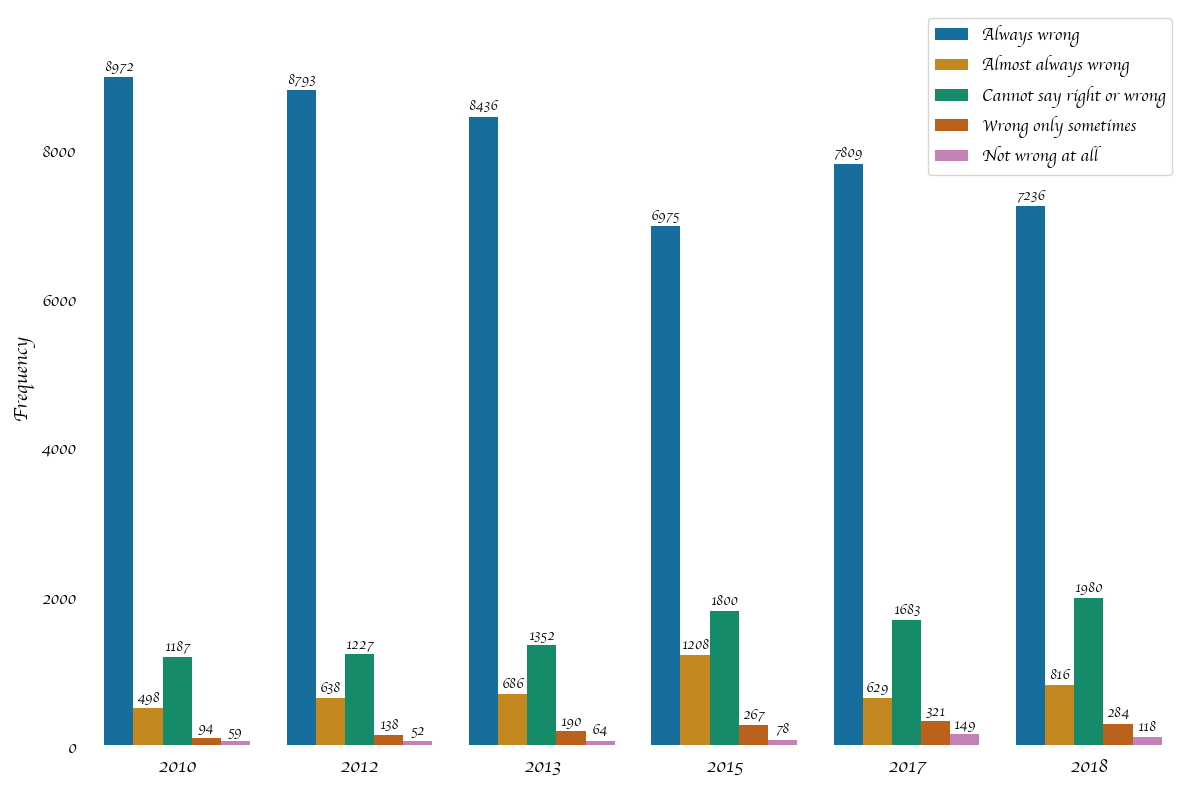

In [160]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='year', y='counts',data=tidy_df_counts, hue='attitudes', 
            palette=sns.color_palette("colorblind")[:5], dodge=True)#use colorblind color for colorblinded people
ax.set_facecolor('white') #set background as white

#remove spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

#label the frequency on the top of each bar
for i, bar in enumerate(ax.containers):
    heights = [b.get_height() for b in bar]
    for j, height in enumerate(heights):
        ax.annotate(int(heights[j]), xy=(bar[j].get_x()+ bar[j].get_width() / 2, heights[j]),
                    xytext=(0, 0), 
                    textcoords="offset points",
                    ha='center', va='bottom', family='cursive')

ax.legend(loc=1) #move legend to the upper right corner

ax.set_ylim(0, max(tidy_df_counts['counts'])*1.1)#set a higher y-limit to give some room for legend
    
plt.xlabel('') #year is obvious, we don't need the label
plt.xticks(fontsize=14, family='cursive') #set font and size of year on x-axis

plt.ylabel('Frequency', fontsize=14, family='cursive') #set y-label
plt.yticks(fontsize=12, family='cursive') #set font and size of year on x-axis

plt.legend(prop={'family':'cursive', 'size': 12})

#control ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tight_layout() #make sure the layout is efficient
plt.savefig('../figures/Attitudes toward same-sex behavior.pdf', bbox_inches = "tight")